In [17]:
# Carrega os pacotes
using LinearAlgebra
using Plots
using GaussQuadrature
using DataFrames
using SparseArrays


# Formulação forte

Dadas as constantes reais $\alpha > 0$, $\beta \geq 0$ e $T > 0$, e as funções $f:[0,1]\times[0,T]\rightarrow\mathbb{R}$ e $u_0:[0,1]\rightarrow\mathbb{R}$, determine $u:[0,1]\times[0,T]\rightarrow\mathbb{R}$ tal que
\begin{align*}
\left\{
\begin{aligned}
&u_t(x,t)-\alpha u_{xx}(x,t) + \beta u(x,t) = f(x,t),&& \forall (x,t)\in]0,1[\times[0,T],
\\
&u(0,t)=u(1,t)=0,                                    && \forall t\in[0,T],
\\
&u(x,0) = u_0(x),                                    && \forall x\in[0,1].                
\end{aligned}\right.
\end{align*}

Exemplos de solução exata para o problema acima:
*   Ex. 1. Se $f(x,t)=0$, então $u(x,t)=\frac{1}{\pi^2}\sin(\pi x) e^{-\lambda t}$, com $\lambda = (\alpha\pi^2+\beta)$.
*   Ex. 2. Se $f(x,t)=\frac{-\lambda+\alpha\pi^2+\beta}{\pi^2}\sin(\pi x) e^{-\lambda t}$, então $u(x,t)=\frac{1}{\pi^2}\sin(\pi x) e^{-\lambda t}$, com $\lambda = 1$.

In [18]:
function exemplo1()
    T = 1.0
    α = 1.0
    β = 1.0
    λ = α * π^2 + β
    f(x, t) = 0.0
    u₀(x) = sin(π * x) / π^2
    u(x, t) = sin(π * x) * (exp(-λ * t) / π^2)
    return T, α, β, f, u₀, u
end
function Exemplo2()
    T = 1.0
    α = 1.0
    β = 1.0
    λ = 1.0
    f(x, t) = sin(π * x) * ((-λ + α * π^2 + β) * exp(-λ * t) / π^2)
    u₀(x) = sin(π * x) / π^2
    u(x, t) = sin(π * x) * (exp(-λ * t) / π^2)
    return T, α, β, f, u₀, u
end

"Retorna os valores de `T`, `α`, `β`, `f`, `u₀` e `u` de acordo com o exemplo escolhido."
function dados_de_entrada(exemplo::Int)
    if exemplo == 1
        return exemplo1()
    elseif exemplo == 2
        return Exemplo2()
    else
        error("Exemplo inválido. Escolha 1 ou 2.")
    end
end

dados_de_entrada

# Formulação fraca

Dadas as constantes reais $\alpha > 0$, $\beta \geq 0$ e $T > 0$, e as funções $f:[0,1]\times[0,T]\rightarrow\mathbb{R}$ e $u_0:[0,1]\rightarrow\mathbb{R}$, determine $u(t)\in V$, $t\in[0,T]$, tal que

\begin{align*}
\left\{
\begin{aligned}
& \int_0^1 u'(x,t)v(x) dx
+ \alpha \int_0^1\frac{\partial u}{\partial x}(x,t)\frac{\partial v}{\partial x}(x)dx
+ \beta  \int_0^1 u(x,t)v(x)dx
= \int_0^1f(x,t)v(x)dx,
\quad \forall v\in V,
\\[8pt]
& u(x,0) = u_0(x), 
\quad x\in]0,1[.
\end{aligned}
\right.
\end{align*}

Para simplificar a escrita, vamos reescrever a equação acima utilizando dois operadores. O primeiro, é dado por

\begin{align*}
\kappa:V\times V\rightarrow\mathbb{R},\;(w,v)\mapsto \kappa(w,v)=
  \alpha \int_0^1\frac{\partial w}{\partial x}(x)\frac{\partial v}{\partial x}(x)dx
+ \beta  \int_0^1 w(x)v(x)dx.
\end{align*}

Quanto ao segundo operador, considere

\begin{align*}
\big(w,v\big) = \int_0^1 w(x) v(x)dx.
\end{align*}

Utilizando esses operadores, a formulação fraca pode ser reescrita como:
Dadas as constantes reais $\alpha > 0$, $\beta \geq 0$ e $T > 0$, e as funções $f:[0,1]\times[0,T]\rightarrow\mathbb{R}$ e $u_0:[0,1]\rightarrow\mathbb{R}$, determine $u(t)\in V$, $t\in[0,T]$, tal que

\begin{align*}
\left\{
\begin{aligned}
& \big(u'(t),v\big) + \kappa(u(t),v) = \big(f(t),v\big),
\quad \forall v\in V,
\\[8pt]
& u(0) = u_0.
\end{aligned}
\right.
\end{align*}


# Problema semidiscreto - via o método de Galerkin na variável espacial

Dadas as constantes reais $\alpha > 0$, $\beta \geq 0$ e $T > 0$, e as funções $f:[0,1]\times[0,T]\rightarrow\mathbb{R}$, $u_0^{}:[0,1]\rightarrow\mathbb{R}$ e $u_{0h}^{}\in V_m$ uma aproximação para $u_0^{}$, determine $u_h(t)\in V_m=[\varphi_1,\varphi_2,\dots,\varphi_{m}]$, $t\in[0,T]$, tal que

\begin{align*}
\left\{
\begin{aligned}
& \big(u_h'(t),v_h\big) + \kappa(u_h(t),v_h) = \big(f(t),v_h\big),
\quad \forall v_h\in V_m,
\\[8pt]
& u_h(0) = u_{0h}.
\end{aligned}
\right.
\end{align*}

# Problema totalmente discreto - via o método de Galerkin no espaço e Crank-Nicolson no tempo

Como o título sugere, o problema aproximado será definido utilizando o método de Galerkin para a variável espacial e o método de Crank-Nicolson para a variável temporal.
No espaço, já definimos $V_m$, o subespaço de dimensão finita de $V$, gerado pelas funções base $\varphi_1,\varphi_2,\dots,\varphi_m$.
No tempo, precisamos estabelecer a discretização temporal para aplicar o método de diferenças finitas escolhido. 
Nesse sentido, seja $\tau>0$ uma constante real positiva, e considere $0=t_0<t_1<\dots<t_N\leq T$ uma discretização unifome no intervalo $[0,T]$.
Além disso, defina $t_{n-\frac{1}{2}}=\frac{t_n+t_{n-1}}{2}$ como o ponto médio do intervalo $[t_{n-1},t_n]$. 
A seguir, apresentamos a ilustração de uma partição do intervalo de tempo $[0,T]$.

<div style="text-align: center;">
    <img src="./imagens/Fig05.png" alt="img" style="width: 80%;">
</div>

Sob tais considerações, segue a definição do problema aproximado: Dadas as constantes reais $\alpha > 0$, $\beta \geq 0$ e $T > 0$, e as funções $f:[0,1]\times[0,T]\rightarrow\mathbb{R}$, $u_0^{}:[0,1]\rightarrow\mathbb{R}$ e $u_{0h}^{}\in V_m$ uma aproximação para $u_0^{}$, determine $U^n\in V_m=[\varphi_1,\varphi_2,\dots,\varphi_{m}]$, tal que

\begin{align*}
\left\{
\begin{aligned}
& \Big(\frac{U^n-U^{n-1}}{\tau},v_h\Big) + \kappa\Big(\frac{U^n+U^{n-1}}{2},v_h\Big) = \big(f(t_{n-\frac{1}{2}}),v_h\big),
\quad \forall v_h\in V_m,\quad n=1,2,\dots,N,
\\[8pt]
& U^0 = u_{0h}.
\end{aligned}
\right.
\end{align*}

## Formulação matricial

Tomando $\displaystyle U^n(x) = \sum_{j=1}^{m} C_j^{n}\varphi_j(x)$ e $v_h=\varphi_i$, para $i=1,2,\dots,m$, temos o seguinte sistema:

\begin{align*}
\left\{
\begin{aligned}
& \Big(\frac{\sum_{j=1}^{m}(C_j^n-C_j^{n-1})\varphi_j}{\tau},\varphi_1\Big) + \kappa\Big(\frac{\sum_{j=1}^{m}(C_j^n+C_j^{n-1})\varphi_j}{2},\varphi_1\Big) = \big(f(t_{n-\frac{1}{2}}),\varphi_1\big), 
\\[10pt]
& \Big(\frac{\sum_{j=1}^{m}(C_j^n-C_j^{n-1})\varphi_j}{\tau},\varphi_2\Big) + \kappa\Big(\frac{\sum_{j=1}^{m}(C_j^n+C_j^{n-1})\varphi_j}{2},\varphi_2\Big) = \big(f(t_{n-\frac{1}{2}}),\varphi_2\big), 
\\
& \vdots
\\
& \Big(\frac{\sum_{j=1}^{m}(C_j^n-C_j^{n-1})\varphi_j}{\tau},\varphi_m\Big) + \kappa\Big(\frac{\sum_{j=1}^{m}(C_j^n+C_j^{n-1})\varphi_j}{2},\varphi_m\Big) = \big(f(t_{n-\frac{1}{2}}),\varphi_m\big).
\end{aligned}\right.
\end{align*}

Com isso, dado que os operadores $\kappa$ e $\big(\cdot,\cdot\big)$ são lineares em cada componente, temos:

\begin{align*}
\left\{
\begin{aligned}
& 
      \big(\varphi_1,\varphi_1\big)\frac{C_1^n-C_1^{n-1}}{\tau}+      \big(\varphi_2,\varphi_1\big)\frac{C_2^n-C_2^{n-1}}{\tau} + \dots +       \big(\varphi_m,\varphi_1\big)\frac{C_m^n-C_m^{n-1}}{\tau}
\quad+\quad
\kappa\big(\varphi_1,\varphi_1\big)\frac{C_1^n+C_1^{n-1}}{2   }+\kappa\big(\varphi_2,\varphi_1\big)\frac{C_2^n+C_2^{n-1}}{2   } + \dots + \kappa\big(\varphi_m,\varphi_1\big)\frac{C_m^n+C_m^{n-1}}{2   } 
= \big(f(t_{n-\frac{1}{2}}),\varphi_1\big), 
\\[10pt]
&
      \big(\varphi_1,\varphi_2\big)\frac{C_1^n-C_1^{n-1}}{\tau}+      \big(\varphi_2,\varphi_2\big)\frac{C_2^n-C_2^{n-1}}{\tau} + \dots +       \big(\varphi_m,\varphi_2\big)\frac{C_m^n-C_m^{n-1}}{\tau}
\quad+\quad
\kappa\big(\varphi_1,\varphi_2\big)\frac{C_1^n+C_1^{n-1}}{2   }+\kappa\big(\varphi_2,\varphi_2\big)\frac{C_2^n+C_2^{n-1}}{2   } + \dots + \kappa\big(\varphi_m,\varphi_2\big)\frac{C_m^n+C_m^{n-1}}{2   } 
= \big(f(t_{n-\frac{1}{2}}),\varphi_2\big), 
\\
& \vdots
\\
& 
      \big(\varphi_1,\varphi_m\big)\frac{C_1^n-C_1^{n-1}}{\tau}+      \big(\varphi_2,\varphi_m\big)\frac{C_2^n-C_2^{n-1}}{\tau} + \dots +       \big(\varphi_m,\varphi_m\big)\frac{C_m^n-C_m^{n-1}}{\tau}
\quad+\quad
\kappa\big(\varphi_1,\varphi_m\big)\frac{C_1^n+C_1^{n-1}}{2   }+\kappa\big(\varphi_2,\varphi_m\big)\frac{C_2^n+C_2^{n-1}}{2   } + \dots + \kappa\big(\varphi_m,\varphi_m\big)\frac{C_m^n+C_m^{n-1}}{2   } 
= \big(f(t_{n-\frac{1}{2}}),\varphi_m\big), .
\end{aligned}\right.
\end{align*}


Note que esse sistema pode ser reescrito na seguinte forma matricial:

\begin{align*}
\begin{bmatrix}
\big(\varphi_1,\varphi_1\big)&\big(\varphi_2,\varphi_1\big)&\dots&\big(\varphi_m,\varphi_1\big)
\\[10pt]
\big(\varphi_1,\varphi_2\big)&\big(\varphi_2,\varphi_2\big)&\dots&\big(\varphi_m,\varphi_2\big)
\\
\vdots&\vdots&\ddots& \vdots  
\\
\big(\varphi_1,\varphi_m\big)&\big(\varphi_2,\varphi_m\big)&\dots&\big(\varphi_m,\varphi_m\big)
\end{bmatrix}
\frac{C^n-C^{n-1}}{\tau}
\quad+\quad
\begin{bmatrix}
\kappa\big(\varphi_1,\varphi_1\big)&\kappa\big(\varphi_2,\varphi_1\big)&\dots&\kappa\big(\varphi_m,\varphi_1\big)
\\[10pt]
\kappa\big(\varphi_1,\varphi_2\big)&\kappa\big(\varphi_2,\varphi_2\big)&\dots&\kappa\big(\varphi_m,\varphi_2\big)
\\
\vdots&\vdots&\ddots& \vdots  
\\
\kappa\big(\varphi_1,\varphi_m\big)&\kappa\big(\varphi_2,\varphi_m\big)&\dots&\kappa\big(\varphi_m,\varphi_m\big)
\end{bmatrix}
\frac{C^n+C^{n-1}}{2   }
=
\begin{bmatrix}
\big(f(t_{n-\frac{1}{2}}),\varphi_1\big)\\[10pt]
\big(f(t_{n-\frac{1}{2}}),\varphi_2\big)\\
\vdots\\
\big(f(t_{n-\frac{1}{2}}),\varphi_m\big)\\
\end{bmatrix}.
\end{align*}

Por fim, definindo 

\begin{align*}
M_{i,j} = (\varphi_j,\varphi_i),
\quad
K_{i,j} = \kappa(\varphi_j,\varphi_i)
\quad\text{e}\quad
F_i^{n-\frac{1}{2}} = \big(f(t_{n-\frac{1}{2}}),\varphi_i\big), 
\quad\text{com}\quad
i,j\in\{1,2,3,\dots,m\},
\end{align*}

obtemos a formulação matriz-vetor do problema aproximado, que consiste em determinar $C^n\in\mathbb{R}^m$ tal que
\begin{align*}
\left\{
\begin{aligned}
& M\frac{C^n-C^{n-1}}{\tau}
+K\frac{C^n+C^{n-1}}{2}=F^{n-\frac{1}{2}},
\quad n=1,2,\dots,N,
\\
& C^0=???.
\end{aligned}
\right.
\end{align*}

## Aproximação de $u_0$: exemplos de escolhas de $U^0 \in V_m$

Qualquer função $U^0 \in V_m$ que esteja suficientemente próxima de $u_0$ é uma escolha viável. 
O quão próxima ela deve estar, e em qual norma essa distância é medida, só fica claro quando realizamos a demonstração da estimativa de erro entre a solução aproximada e a solução exata.
Não vamos entrar nesses detalhes aqui. 
Contudo, as escolhas que apresentaremos a seguir usualmente satisfazem tais condições.

### Opção 1: Tomando $U^0$ como a interpolante de $u_0$ - se a base satisfaz a propriedade $\varphi_j(x_i) = \delta_{i,j}$

Quando a base satisfaz a propriedade $\varphi_j(x_i) = \delta_{i,j}$, onde $x_i$ é um nó da malha espacial, temos que 
$$
U^0(x_i) = \sum_{j=1}^m C_j^0 \varphi_j(x_i) = C_i^0.
$$

Consequentemente, para esse tipo de base, se tomarmos $C_i^0$ como $u_0(x_i)$, então $U^0$ interpola $u_0$.
Assim sendo, nesse caso, vamos definir
$$
C^0 =
\begin{bmatrix}
u_0(x_1)\\
u_0(x_2)\\
\vdots\\
u_0(x_m)
\end{bmatrix}.
$$

### Opção 2: Tomando $U^0$ como a projeção $L^2$ de $u_0$

Seja $U^0\in V_m$ tal que
$$
\big(U^0-u_0,v_h\big)=0,\quad\forall v_h\in V_m.
$$

Tomando $\displaystyle U^0(x) = \sum_{j=1}^{m} C_j^{0}\varphi_j(x)$ e $v_h=\varphi_i$, para $i=1,2,\dots,m$, na equação acima, temos que
$$
MC^0=
\begin{bmatrix}
\big(u_0,\varphi_1\big)\\
\big(u_0,\varphi_2\big)\\
\vdots\\
\big(u_0,\varphi_m\big)
\end{bmatrix}.
$$

### Opção 3: Tomando $U^0$ como a projeção $H_0^1$ de $u_0$

Seja $U^0\in V_m$ tal que
$$
\Big(\frac{d}{dx}(U^0-u_0),\frac{dv_h}{dx}\Big)=0,\quad\forall v_h\in V_m.
$$

Tomando $\displaystyle U^0(x) = \sum_{j=1}^{m} C_j^{0}\varphi_j(x)$ e $v_h=\varphi_i$, para $i=1,2,\dots,m$, na equação acima, temos que
$$
\begin{bmatrix}
\big(\partial_x\varphi_1,\partial_x\varphi_1\big)&\big(\partial_x\varphi_2,\partial_x\varphi_1\big)&\dots&\big(\partial_x\varphi_m,\partial_x\varphi_1\big)
\\[10pt]
\big(\partial_x\varphi_1,\partial_x\varphi_2\big)&\big(\partial_x\varphi_2,\partial_x\varphi_2\big)&\dots&\big(\partial_x\varphi_m,\partial_x\varphi_2\big)
\\
\vdots&\vdots&\ddots& \vdots  
\\
\big(\partial_x\varphi_1,\partial_x\varphi_m\big)&\big(\partial_x\varphi_2,\partial_x\varphi_m\big)&\dots&\big(\partial_x\varphi_m,\partial_x\varphi_m\big)
\end{bmatrix}
C^0=
\begin{bmatrix}
\big(\partial_xu_0,\partial_x\varphi_1\big)\\
\big(\partial_xu_0,\partial_x\varphi_2\big)\\
\vdots\\
\big(\partial_xu_0,\partial_x\varphi_m\big)
\end{bmatrix}.
$$

### Opção 4: Usando o operador $\kappa$ para realizar a projeção de $u_0$

Seja $U^0\in V_m$ tal que
$$
\kappa\big(U^0-u_0,v_h\big)=0,\quad\forall v_h\in V_m.
$$

Tomando $\displaystyle U^0(x) = \sum_{j=1}^{m} C_j^{0}\varphi_j(x)$ e $v_h=\varphi_i$, para $i=1,2,\dots,m$, na equação acima, temos que
$$
KC^0=
\begin{bmatrix}
\kappa\big(u_0,\varphi_1\big)\\
\kappa\big(u_0,\varphi_2\big)\\
\vdots\\
\kappa\big(u_0,\varphi_m\big)
\end{bmatrix}.
$$

## Monta local

### Cálculo da matriz local $K^e$ - via quadratura gaussiana

\begin{align*}
K^e_{a,b} 
 = 
  \alpha \int_{x_{1}^e}^{x_2^e}\frac{d\varphi_b^e}{dx}(x)\frac{d\varphi_a^e}{dx}(x)dx
+ \beta  \int_{x_{1}^e}^{x_2^e}\varphi_b^e(x)\varphi_a^e(x)dx
 =
\frac{2\alpha}{h} \int_{-1}^{1}
\frac{d\phi_b}{d\xi}(\xi)\frac{d\phi_a}{d\xi}(\xi)d\xi
+ \frac{\beta h}{2}  \int_{-1}^{1}
\phi_b(\xi)\phi_a(\xi) d\xi
=
\frac{2\alpha}{h} \sum_{j=1}^{n_{pg}} W_j \frac{d\phi_b}{d\xi}(P_j)\frac{d\phi_a}{d\xi}(P_j)
+ \frac{\beta h}{2} \sum_{j=1}^{n_{pg}} W_j \phi_b(P_j)\phi_a(P_j)
\end{align*}

In [19]:
"Retorna o valor de `ϕₐ(ξ)` para um dado `ξ` e `a`."
function ϕ(ξ::Float64, a::Int)::Float64
    if a == 1
        return (1.0 - ξ) / 2.0
    elseif a == 2
        return (1.0 + ξ) / 2.0
    else
        error("a deve ser 1 ou 2.")
    end
end

"Retorna a derivada de `ϕₐ(ξ)` em relação a `ξ` para um dado `ξ` e `a`."
function dϕ(ξ, a)
    if a == 1
        return -1.0 / 2.0
    elseif a == 2
        return 1.0 / 2.0
    else
        error("a deve ser 1 ou 2.")
    end
end

"Retorna a matriz local `Kᵉ` de um elemento arbitrário `e` de tamanho `h`."
function monta_Kᵉ(α::Float64, β::Float64, h::Float64)::Matrix{Float64}
    # Constantes associadas aos termos da primeira e da segunda integral
    cst1 = 2.0 * α / h
    cst2 = β * h / 2.0

    # Pontos e pesos de quadratura de Gauss-Legendre
    n_pg = 2
    P, W = legendre(n_pg)

    # Inicializa a matriz local Kᵉ
    Kᵉ = zeros(Float64, 2, 2)

    # Loop sobre as entradas da matriz local Kᵉ
    for a = 1:2
        for b = 1:2
            # Loop sobre os pontos de quadratura
            for j = 1:n_pg
                # Calcula a contribuição da quadratura na entrada Kᵉ[a,b]
                Kᵉ[a, b] += W[j] * (cst1 * dϕ(P[j], b) * dϕ(P[j], a) + cst2 * ϕ(P[j], b) * ϕ(P[j], a))
            end
        end
    end

    return Kᵉ
end

monta_Kᵉ

### Cálculo do vetor local $F^e$ - via quadratura gaussiana

\begin{align*}
F_a^e 
 = 
\int_{x_1^e}^{x_2^e}f(x)\varphi_a^e(x)dx
 =
\frac{h}{2} \int_{-1}^{1}f\big(x(\xi,e)\big)\phi_a(\xi)d\xi
 \approx
\frac{h}{2} \sum_{j=1}^{n_{pg}} W_j f\big(x(P_j,e)\big)\phi_a(P_j).
\end{align*}

In [20]:
"""
Mapeia um ponto `ξ` do intervalo padrão `[-1, 1]` para o intervalo físico `[x1e, x2e]`.

# Parâmetros
- `ξ::Float64`: Ponto no intervalo padrão `[-1, 1]`.
- `h::Float64`: Comprimento do e-ésimo elemento, calculado como `h = x2e - x1e`.
- `x1e::Float64`: Coordenada do ponto inicial `x1e` do e-ésimo elemento.

# Retorno
- Coordenada correspondente a `ξ` no intervalo `[x1e, x2e]`.
"""
function x_de_ξ(ξ::Float64, h::Float64, x1e::Float64)::Float64
    return (ξ + 1.0) * h / 2.0 + x1e
end

"""
Monta o vetor força local `Fᵉ` para o `e`-ésimo elemento `[x1e, x2e]` de tamanho `h`.

# Parâmetros
- `f::Function`: Função f(x).
- `h::Float64`: Comprimento do e-ésimo elemento, calculado como `h = x2e - x1e`.
- `x1e::Float64`: Coordenada do ponto inicial `x1e` do e-ésimo elemento.
- `P::Vector{Float64}`: Vetor dos pontos de quadratura no intervalo padrão `[-1, 1]`.
- `W::Vector{Float64}`: Vetor dos pesos de quadratura associados a `P`.

# Retorno
- `Fᵉ::Vector{Float64}`: Vetor força local de tamanho 2, correspondente ao elemento `[x1e, x2e]`.
"""
function monta_Fᵉ(f::Function, h::Float64, x1e::Float64, P::Vector{Float64}, W::Vector{Float64})::Vector{Float64}
    # Inicializa o vetor local Fᵉ
    Fᵉ = zeros(Float64, 2)

    # Loop sobre as entradas do vetor local Fᵉ
    for a = 1:2
        # Loop sobre os pontos de quadratura
        for j = 1:length(P)
            # Mapeia o ponto de quadratura `P[j]` de [-1,1] para [x1e,x2e]
            x = x_de_ξ(P[j], h, x1e)
            # Calcula e acumula a contribuição da quadratura em Fᵉ[a]
            Fᵉ[a] += W[j] * f(x) * ϕ(P[j], a) * h / 2
        end
    end

    return Fᵉ
end

monta_Fᵉ

Para calcular o vetor $F^e$, é necessário definir a função de mudança de variável que mapeia os pontos do elemento padrão $[-1, 1]$ para o e-ésimo elemento $[x_1^e, x_2^e]$.
<div style="text-align: center;">
    <img src="./imagens/Fig03.png" alt="img" style="width: 80%;">
</div>

## Estruturas auxiliares LG e EQ

### LG: Relação entre a numeração local e global das funções $\varphi$

Para adicionar corretamente os valores da matriz local $K^e$ e do vetor local $F^e$ nas devidas entradas da matriz global $K$ e do vetor global $F$, é necessário mapear a correspondência entre a numeração local e global das funções de base.
Neste momento, vamos ignorar a condição na fronteira, ou seja, quais funções globais pertencem ou não à base do subespaço de dimensão finita $V_m$. 
Vamos utilizar todas as funções globais e definir a correspondência entre a nomenclatura local e global. Essa informação será armazenada em uma matriz denotada por $LG$, as iniciais de local e global.

Dado $n_e\in\mathbb{N}$, considere a discretização uniforme do intervalo $[0,1]$, definida por $0 = x_1 < x_2 < \dots < x_{n_e} < x_{n_{e}+1} = 1$, onde cada subintervalo tem comprimento $h=1/n_e$. 
A figura abaixo ilustra a discretização da malha, assim como as funções globais $\varphi_i$, para $i=1,2,\dots,n_e+1$.

<div style="text-align: center;">
    <img src="./imagens/Fig04.png" alt="img" style="width: 80%;">
</div>



A matriz $LG$ armazena a correspondência entre a nomenclatura local e global de cada elemento finito. Assim, ela possui $n_e$ colunas, cada uma relativa a um elemento finito.
Na $e$-ésima coluna, temos a numeração global das funções locais $\varphi_1^e$ e $\varphi_2^e$.
Portanto, $LG$ tem tamanho $2\times n_e$, com cada entrada dada por

\begin{align*}
LG(a,e) = 
\begin{cases}
e,&\quad\text{se } a=1,
\\ 
e+1,&\quad\text{se } a=2.
\end{cases}
\end{align*}

A matriz $LG$ completa é dada por

\begin{align*}
LG = 
\begin{bmatrix}
1 & 2 & \dots & e-1 & e   & \dots & n_e  \\
2 & 3 & \dots & e   & e+1 & \dots & n_e+1\\
\end{bmatrix}_{2\times n_e}.
\end{align*}

In [21]:
"""
Retorna uma matriz `2 x ne` com a numeração global de cada função local.

# Parâmetros
- `ne::Int`: Número total de elementos (ou intervalos) em que o domínio `[0,1]` é dividido.
"""
function monta_LG(ne::Int)::Matrix{Int}
    return transpose(hcat(1:ne, 2:ne+1))
end

monta_LG

### EQ: Relação entre a numeração global e de equação das funções $\varphi$

No caso da equação diferencial abordada, a condição na fronteira é dada por $u(0,t)=u(1,t)=0$. 
Com isso, para as funções lineares por partes que estamos considerando, a primeira e a última, ou seja, $\varphi_1$ e $\varphi_{n_e+1}$, não fazem parte da base do subespaço $V_m$. 
Portanto, essas duas funções precisam ser desconsideradas, e as demais devem ser reenumeradas. 
Essa informação será armazenada em um vetor denotado por $EQ$, as iniciais de "equação". 
Cada entrada do vetor $EQ$ possui a nova numeração de uma função global. Portanto, o tamanho do vetor $EQ$ é dado pelo número de funções globais, ou seja, $n_e + 1$.

Considerando as especificações para o tipo de fronteira e as funções $\varphi$ abordadas, o vetor $EQ$ é dado por

\begin{align*}
EQ = 
\begin{bmatrix}
m+1 & 1 & 2 &\dots & m & m+1 
\end{bmatrix}_{(n_e+1)}
\end{align*}
com $m=n_e-1$.

In [22]:
"""
Retorna o valor de `m` o vetor `EQ`.

# Parâmetros
- `ne::Int`: Número total de elementos (ou intervalos) em que o domínio `[0,1]` é dividido.

# Retorno
- Uma tupla contendo:
  - `m::Int`: A dimensão do espaço aproximado `Vₘ`. Neste problema temos que `m = ne - 1`.
  - `EQ::Vector{Int}`: Um vetor de inteiros que fornece a reenumeração das funções globais `φ`. Neste problema temos que EQ = [m + 1; 1:m; m + 1].
"""
function monta_EQ(ne::Int)::Tuple{Int,Vector{Int}}
  m = ne - 1
  EQ = vcat(m + 1, 1:m, m + 1)
  return m, EQ
end

monta_EQ

## Monta global

### Montagem da matriz global $K$ a partir da matriz local $K^e$

In [23]:
"""
Retorna a matriz tridiagonal `K` de tamanho `m x m` montada a partir da matriz local `Kᵉ`.

# Parâmetros
- `α::Float64`: Parâmetro α fornecido como dado de entrada da equação diferencial em estudo.
- `β::Float64`: Parâmetro β fornecido como dado de entrada da equação diferencial em estudo.
- `γ::Float64`: Parâmetro γ fornecido como dado de entrada da equação diferencial em estudo.
- `ne::Int`: Número total de elementos (ou intervalos) em que o domínio `[0,1]` é dividido.
- `m::Int`: Dimensão do espaço aproximado `Vₘ`.
- `EQoLG::Matrix{Int}`: ≡ EQ[LG].
"""
function monta_K(α::Float64, β::Float64, ne::Int, m::Int, EQoLG::Matrix{Int})::SparseMatrixCSC{Float64,Int64}
    h = 1.0 / ne           # Comprimento de cada elemento finito
    K = spzeros(m + 1, m + 1)  # Inicializa a matriz esparsa K com tamanho (m+1) x (m+1)
    Kᵉ = monta_Kᵉ(α, β, h) # Calcula a matriz local Kᵉ

    # Loop sobre os elementos
    for e = 1:ne
        for a = 1:2
            i = EQoLG[a, e]
            for b = 1:2
                j = EQoLG[b, e]
                K[i, j] += Kᵉ[a, b]
            end
        end
    end

    # Remove a última linha e coluna da matriz K
    return K[1:m, 1:m]
end

monta_K

### Montagem do vetor global $F$ a partir do vetor local $F^e$

In [24]:
"""
Retorna o vetor força `F` de tamanho `m`, utilizando os vetores locais `Fᵉ`.

# Parâmetros
- `f::Function`: Função f(x).
- `ne::Int`: Número total de elementos (ou intervalos) em que o domínio `[0,1]` é dividido.
- `m::Int`: Dimensão do espaço aproximado `Vₘ`.
- `EQoLG::Matrix{Int}`: ≡ EQ[LG].
"""
function monta_F(f::Function, ne::Int, m::Int, EQoLG::Matrix{Int})::Vector{Float64}
    h = 1.0 / ne       # Comprimento de cada elemento finito
    F = zeros(m + 1)     # Inicializa o vetor F
    P, W = legendre(5) # Pontos e pesos de quadratura de Gauss-Legendre

    # Loop sobre os elementos
    for e = 1:ne
        Fᵉ = monta_Fᵉ(f, h, (e - 1) * h, P, W) # Calcula o vetor local Fᵉ
        for a = 1:2
            i = EQoLG[a, e]
            F[i] += Fᵉ[a]
        end
    end

    # Remove a última entrada do vetor global F
    return F[1:m]
end

monta_F

# Cálculo do erro no tempo $t_n$

O erro na norma do espaço $L^2(]0,1[)$ entre a solução exata $u(x,t_n)$ e a solução aproximada $U^n(x)$, definida por $\displaystyle U^n(x) = \sum_{j=1}^m C_j^n\varphi_j(x)$, é dado por 
$\displaystyle\|u(t_n)-U^n\|=\sqrt{\int_0^1|u(x,t_n)-U^n(x)|^2dx}$.

Dessa forma, denotando $\mathcal{E}_h^n=\|u(t_n)-U^n\|$ e $\bar{C}^n=[C^n;0]$, temos que:

\begin{align*}
(\mathcal{E}_h^n)^2 
\approx
\frac{h}{2} \sum_{e=1}^{n_e} \sum_{j=1}^{n_{pg}} 
W_j|u\big(x(P_j,e),t_n\big) - \bar{C}_{EQoLG(1,e)}^n\phi_1(P_j) - \bar{C}_{EQoLG(2,e)}^n\phi_2(P_j) |^2.
\end{align*}

In [25]:
@doc raw"""
Calcula a norma L² da diferença entre duas funções, `z(x)` e `Z(x)`, 
onde `Z(x)` pertence ao espaço aproximado `Vₘ`, sendo expressa como `Z(x) = Σ_{j=1}^{m} C_j φ_j(x)`. 
A integral da diferença é aproximada em cada elemento finito por meio da quadratura de Gauss-Legendre.

# Parâmetros:
- `z::Function`: Função `z(x)` que representa a solução exata no domínio.
- `C̄::Vector{Float64}`: Vetor de coeficientes estendido, `C̄ = [C; 0]`, onde `C` é o vetor de coeficientes que define a função aproximada `Z(x)`.
- `ne::Int`: Número total de elementos (ou intervalos) em que o domínio `[0,1]` é dividido.
- `EQoLG::Matrix{Int}`: ≡ EQ[LG].

# Retorno:
- `Float64`: O valor do erro calculado na norma L² entre `z(x)` e a aproximação `Z(x)`.
"""
function erro_norma_L2(z::Function, C̄::Vector{Float64}, ne::Int, EQoLG::Matrix{Int})::Float64
    h = 1.0 / ne       # Comprimento de cada elemento finito
    erro = 0.0         # Inicializa o erro
    P, W = legendre(5) # Pontos e pesos da quadratura de Gauss-Legendre (5 pontos)

    # Calcula as funções de base ϕ₁ e ϕ₂ nos pontos de quadratura P
    ϕ1P = ϕ.(P, 1)
    ϕ2P = ϕ.(P, 2)

    # Loop sobre todos os elementos finitos
    for e = 1:ne
        # Coeficientes da solução aproximada para o elemento `e`
        c1e = C̄[EQoLG[1, e]]
        c2e = C̄[EQoLG[2, e]]

        # Loop sobre os pontos de quadratura
        for j = 1:length(P)
            x = x_de_ξ(P[j], h, (e - 1) * h) # Mapeia o ponto de quadratura `P[j]` de [-1,1] para [x1e,x2e]
            erro += W[j] * (z(x) - c1e * ϕ1P[j] - c2e * ϕ2P[j])^2
        end
    end

    return sqrt(erro * h / 2)
end

erro_norma_L2

# Cálculo de $C^0$

In [26]:
"""
Atualiza os coeficientes do vetor `C⁰` in-place com base no método especificado para aproximar a função inicial `u₀`.

Existem dois métodos disponíveis:
1. **Interpolação**: Calcula `C⁰` por interpolação nos nós da malha (caso == 1).
2. **Projeção L²**: Calcula `C⁰` resolvendo um sistema linear resultante da projeção L² de `u₀` (caso == 2).

# Parâmetros
- `C⁰::Vector{Float64}`: Vetor de coeficientes a ser modificado in-place.
- `u₀::Function`: Função inicial a ser aproximada.
- `ne::Int`: Número total de elementos (ou intervalos) em que o domínio `[0,1]` é dividido.
- `m::Int`: Dimensão do espaço aproximado `Vₘ`.
- `EQoLG::Matrix{Int}`: ≡ EQ[LG].
- `caso_C⁰::Int`: Escolha do método (1 para interpolação, 2 para projeção L²).
"""
function Calcula_C⁰!(C⁰::Vector{Float64}, u₀::Function, ne::Int, m::Int, EQoLG::Matrix{Int}; caso_C⁰::Int=2)
    if caso_C⁰ == 1
        # Método 1: Interpolação de u₀ nos nós da malha
        h = 1.0 / ne          # Comprimento de cada elemento finito
        @. C⁰ = u₀(h:h:1.0-h) # Atualiza C⁰ in-place aplicando u₀ nos pontos da malha
    elseif caso_C⁰ == 2
        # Método 2: Projeção L² de u₀ no espaço de funções base
        C⁰ .= monta_K(0.0, 1.0, ne, m, EQoLG) \ monta_F(u₀, ne, m, EQoLG)
    else
        error("Caso inválido. Escolha 1 ou 2.")
    end
end

Calcula_C⁰!

# Cálculo de $C^n$

In [27]:
"""
Atualiza os coeficientes do vetor `Cⁿ` in-place.

# Parâmetros
- `Cⁿ::Vector{Float64}`: Vetor de coeficientes a ser modificado in-place.
- `Cⁿ⁻¹::Vector{Float64}`: Vetor de coeficientes da iteração anterior.
- `A::SparseMatrixCSC{Float64, Int64}`: Matriz `M+τ/2*K` do sistema linear.
- `B::SparseMatrixCSC{Float64, Int64}`: Matriz `M-τ/2*K` do sistema linear.
- `ne::Int`: Número total de elementos (ou intervalos) em que o domínio `[0,1]` é dividido.
- `m::Int`: Dimensão do espaço aproximado `Vₘ`.
- `EQoLG::Matrix{Int}`: ≡ EQ[LG].
- `τ::Float64`: Passo de tempo.
- `n::Int`: Índice da iteração atual.
- `f::Function`: Função f(x, t).
"""
function Calcula_Cⁿ!(Cⁿ::Vector{Float64}, Cⁿ⁻¹::Vector{Float64}, A::SparseMatrixCSC{Float64,Int64}, B::SparseMatrixCSC{Float64,Int64}, ne::Int, m::Int, EQoLG::Matrix{Int}, τ::Float64, n::Int, f::Function)
    # Calcula o ponto médio t_{n-\frac{1}{2}}
    t_medio = n * τ - τ / 2

    # Monta F^{n-\frac{1}{2}}
    F = monta_F(x -> f(x, t_medio), ne, m, EQoLG)

    # Atualiza Cⁿ
    Cⁿ .= A \ (B * Cⁿ⁻¹ + τ * F)
end

Calcula_Cⁿ!

# Comparando a solução aproximada com a solução exata

In [28]:
function solucao_exata_vs_aproximada(exemplo, caso_C⁰)
    # Carrega o exemplo escolhido
    T, α, β, f, u₀, u = dados_de_entrada(exemplo)

    # Define o número de elementos em que o domínio [0,1] é dividido
    ne = 4

    # Define o número de intervalos em que o intervalo de tempo [0,T] é dividido
    nt = ne

    # Define o passo de tempo τ = T / nt
    τ = T / nt

    # Define o vetor de tempos tₙ
    t = 0:τ:T

    # Define a matriz LG
    LG = monta_LG(ne)

    # Define a dimensão do espaço aproximado Vₘ e o vetor EQ
    m, EQ = monta_EQ(ne)

    # Define a matriz EQoLG
    EQoLG = EQ[LG]

    # Exibe os valores ne, LG, m, EQ e EQoLG
    # display("ne = ")
    # display(ne)
    # display("LG = ")
    # display(LG)
    # display("m = ")
    # display(m)
    # display("EQ = ")
    # display(EQ)
    # display("EQoLG = ")
    # display(EQoLG)

    # Constrói e exibe as matrizes M e K
    M = monta_K(0.0, 1.0, ne, m, EQoLG)
    K = monta_K(α, β, ne, m, EQoLG)
    # display("Matriz M:")
    # display(M)
    # display("Matriz K:")
    # display(K)

    # Define e exibe as matrizes A e B
    A = M + (τ / 2) * K
    B = M - (τ / 2) * K
    # display("Matriz A:")
    # display(A)
    # display("Matriz B:")
    # display(B)

    # Inicializa os vetores Cⁿ⁻¹ e Cⁿ
    Cⁿ⁻¹ = zeros(m)
    Cⁿ = zeros(m)

    # Define as malhas de solução exata e aproximada
    malha_solucao_exata = 0:0.01:1
    malha_solucao_aproximada = 0:1/ne:1

    # Define os limites fixos para o eixo y
    ylim_inferior = 0    # Ajuste conforme necessário
    ylim_superior = 0.11 # Ajuste conforme necessário

    # Inicializa o vetor para armazenar os erros
    erros = zeros(nt + 1)

    # Cria uma animação
    anim = @animate for n = 0:nt
        # Atualiza os coeficientes Cⁿ⁻¹ para n=0 na primeira iteração
        if n == 0
            Calcula_C⁰!(Cⁿ⁻¹, u₀, ne, m, EQoLG; caso_C⁰=caso_C⁰)
        else
            # Calcula Cⁿ em iterações posteriores
            Calcula_Cⁿ!(Cⁿ, Cⁿ⁻¹, A, B, ne, m, EQoLG, τ, n, f)
            Cⁿ⁻¹ .= Cⁿ
        end

        # Calcula o erro na norma L²
        erros[n+1] = erro_norma_L2(x -> u(x, t[n+1]), [Cⁿ⁻¹; 0], ne, EQoLG)

        # Cria a figura com layout único
        plt = plot(size=(800, 400),
            title="Soluções Exata e Aproximada em t_$(n)= $(t[n+1])",
            xlabel="x",
            legend=:topright,
            ylim=(ylim_inferior, ylim_superior))

        # Gráfico da solução exata u(x, t[n+1])
        plot!(plt, malha_solucao_exata, u.(malha_solucao_exata, t[n+1]),
            lw=3, color=:blue, label="u(x,t_$(n))")

        # Gráfico da solução aproximada Uⁿ(x)
        plot!(plt, malha_solucao_aproximada, [0; Cⁿ⁻¹; 0],
            lw=3, color=:red, linestyle=:dash, markershape=:circle, label="U^$(n)(x)")
    end

    # Exibe o erro na norma L²
    display("Erros na norma L²:")
    display(erros)

    # Exibe o erro máximo na norma L²
    display("Erro máximo na norma L²:")
    display(maximum(erros))

    # Salva o GIF
    gif(anim, "imagens/solucao_exata_vs_aproximada.gif", fps=1)
end

solucao_exata_vs_aproximada (generic function with 1 method)

"Erros na norma L²:"

5-element Vector{Float64}:
 0.003980336614548407
 0.0035877068013172825
 0.0027079361814647588
 0.0021239631440615673
 0.0016515189350468015

"Erro máximo na norma L²:"

0.003980336614548407

┌ Info: Saved animation to /home/bcarmo/git_repositories/Problema estacionario unidimensional/imagens/solucao_exata_vs_aproximada.gif
└ @ Plots /home/bcarmo/.julia/packages/Plots/du2dt/src/animation.jl:156


Plots.AnimatedGif("/home/bcarmo/git_repositories/Problema estacionario unidimensional/imagens/solucao_exata_vs_aproximada.gif")
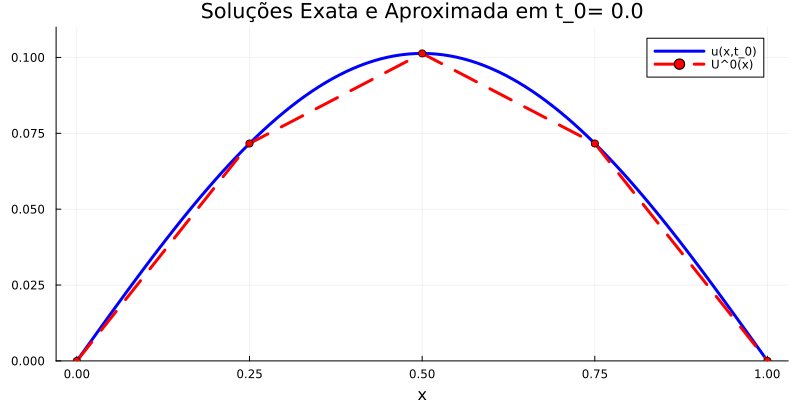

In [29]:
exemplo = 2
caso_C⁰ = 1
solucao_exata_vs_aproximada(exemplo, caso_C⁰)

# Estudo da convergência do erro

In [30]:
function estudo_do_erro(exemplo::Int, caso_C⁰::Int)
    # Carrega os parâmetros e funções do exemplo escolhido
    T, α, β, f, u₀, u = dados_de_entrada(exemplo)

    # Define os valores de ne a serem considerados (de 2^2 a 2^17)
    vec_ne = [2^i for i = 2:10]
    vec_nt = vec_ne

    # Inicializa o vetor para armazenar os erros
    vec_erros = zeros(length(vec_ne))

    # Calcula o erro para cada valor de ne
    for idx = 1:length(vec_ne)
        # Define o número de elementos em que o domínio [0,1] é dividido
        ne = vec_ne[idx]
        # Define o número de intervalos em que o intervalo de tempo [0,T] é dividido
        nt = vec_nt[idx]
        # Define o passo de tempo τ = T / nt
        τ = T / nt
        # Define o vetor de tempos tₙ
        t = 0:τ:T
        # Define a matriz LG
        LG = monta_LG(ne)
        # Define a dimensão do espaço aproximado Vₘ e o vetor EQ
        m, EQ = monta_EQ(ne)
        # Define a matriz EQoLG
        EQoLG = EQ[LG]
        # Constrói as matrizes M e K
        M = monta_K(0.0, 1.0, ne, m, EQoLG)
        K = monta_K(α, β, ne, m, EQoLG)
        # Define as matrizes A e B
        A = M + (τ / 2) * K
        B = M - (τ / 2) * K
        # Inicializa os vetores Cⁿ⁻¹ e Cⁿ
        Cⁿ⁻¹ = zeros(m)
        Cⁿ = zeros(m)
        # Inicializa o vetor para armazenar os erros
        erros = zeros(nt + 1)
        # Calcula C⁰ e o erro na norma L²
        Calcula_C⁰!(Cⁿ⁻¹, u₀, ne, m, EQoLG; caso_C⁰=caso_C⁰)
        erros[1] = erro_norma_L2(u₀, [Cⁿ⁻¹; 0], ne, EQoLG)
        # Calcula Cⁿ e o erro na norma L² para n = 1, 2, ..., nt
        for n = 1:nt
            Calcula_Cⁿ!(Cⁿ, Cⁿ⁻¹, A, B, ne, m, EQoLG, τ, n, f)
            Cⁿ⁻¹ .= Cⁿ
            erros[n+1] = erro_norma_L2(x -> u(x, t[n+1]), [Cⁿ⁻¹; 0], ne, EQoLG)
        end
        # Armazena o erro máximo na norma L²
        vec_erros[idx] = maximum(erros)
    end

    return vec_ne, vec_erros
end

function display_erros(vec_ne, vec_erros, exemplo)
    # Calcula o comprimento de cada elemento finito para cada ne
    vec_h = 1.0 ./ vec_ne

    # Cria o gráfico do erro em função de h em escala logarítmica
    plt = plot(
        vec_h, vec_erros, lw=3, linestyle=:solid, markershape=:circle,
        label="Erro", title="Estudo do erro - exemplo $exemplo",
        xscale=:log10, yscale=:log10, legend=:topleft
    )

    # Adiciona a curva teórica de h² ao gráfico
    plot!(plt, vec_h, vec_h .^ 2, lw=3, linestyle=:solid, label="h²")

    # Adiciona rótulos aos eixos
    xlabel!("h")
    ylabel!("Erro")

    # Exibe o gráfico
    display(plt)

    # Exibe a tabela com os valores de h e erro
    display("Tabela com os valores de h e erro - exemplo " * string(exemplo))
    display(DataFrame(h=vec_h, erro=vec_erros))
end

display_erros (generic function with 1 method)

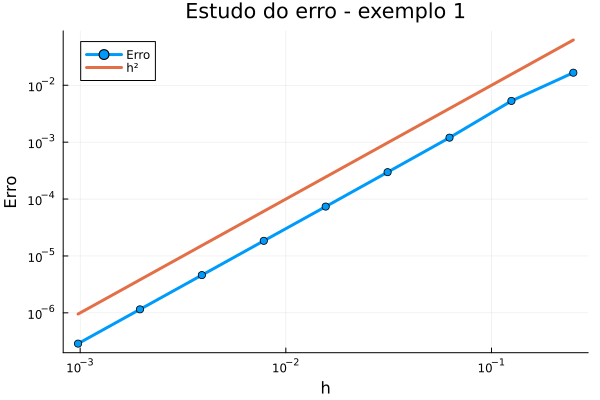

"Tabela com os valores de h e erro - exemplo 1"

Row,h,erro
,Float64,Float64
1,0.25,0.0166198
2,0.125,0.00530589
3,0.0625,0.00119968
4,0.03125,0.000296845
5,0.015625,7.37256e-5
6,0.0078125,1.84386e-5
7,0.00390625,4.60717e-6
8,0.00195312,1.15169e-6
9,0.000976562,2.87924e-7


  0.552272 seconds (4.49 M allocations: 785.326 MiB, 5.80% gc time, 11.74% compilation time)


In [31]:
exemplo = 1
caso_C⁰ = 1
@time begin
     vec_ne, vec_erros = estudo_do_erro(exemplo, caso_C⁰)
end

display_erros(vec_ne, vec_erros, exemplo)

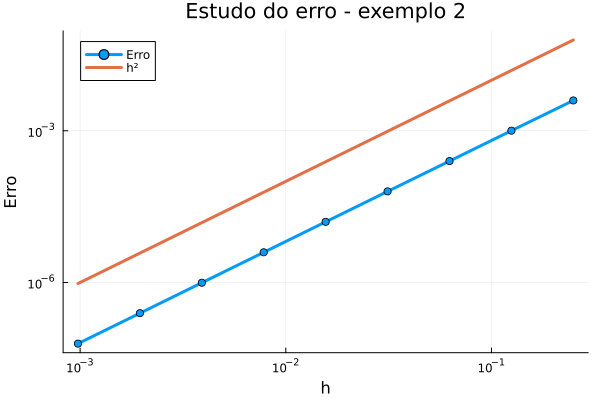

"Tabela com os valores de h e erro - exemplo 2"

Row,h,erro
,Float64,Float64
1,0.25,0.00398034
2,0.125,0.0010052
3,0.0625,0.000251949
4,0.03125,6.33036e-5
5,0.015625,1.58247e-5
6,0.0078125,3.9563e-6
7,0.00390625,9.89128e-7
8,0.00195312,2.47282e-7
9,0.000976562,6.18212e-8


  0.841346 seconds (4.49 M allocations: 785.318 MiB, 4.64% gc time, 6.97% compilation time)


In [32]:
exemplo = 2
caso_C⁰ = 1
@time begin
     vec_ne, vec_erros = estudo_do_erro(exemplo, caso_C⁰)
end

display_erros(vec_ne, vec_erros, exemplo)